 You are given the famous Iris dataset (iris.csv), which contains samples of iris flowers, each described by four features: sepal length, sepal width, petal length, and petal width. The dataset is labeled with three classes: Setosa, Versicolor, and Virginica. 
First take 2 dimensions/features, that is, Sepal Length and Sepal Width.


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import seaborn as sns

In [29]:
df=pd.read_csv("iris.csv")
df=df.drop("Id",axis=1)

In [30]:
df['Species']=LabelEncoder().fit_transform(df['Species'])

In [31]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Function for distance calculation

In [32]:
def minkowski_distance(a, b, p):
    dim = len(a)
    distance = 0
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
    distance = distance**(1/p)
    
    return distance

# Function for prediction and accuracy

In [33]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):
    y_hat = []

    for idx,test_point in X_test.iterrows():
        
        distances = []

        for id,train_point in X_train.iterrows():
            
            distance = minkowski_distance(test_point, train_point, p=p)
            distances.append(distance)
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]
        counter = Counter(y_train[df_nn.index])
        prediction = counter.most_common()[0][0]
        y_hat.append(prediction)
        
    return y_hat


def score(y_hat,y_test):
    count=0
    for i in range(len(y_hat)):
        if(y_hat[i]==y_test[i]):
            count +=1
    
    return count/len(y_hat)

# A) First take 2 dimensions/features, that is, Sepal Length and Sepal Width.


In [34]:
df1=pd.DataFrame(df['SepalLengthCm'])
df1

,SepalLengthCm
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
...,...
145,6.7
146,6.3
147,6.5
148,6.2


In [35]:
df1['SepalWidthCm']=df['SepalWidthCm']
df1['Species']=df['Species']

In [36]:
df1

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [37]:
df1_train=pd.DataFrame(columns=df1.columns)
df1_test=pd.DataFrame(columns=df1.columns)

for i in df1['Species'].unique():
    df3=df1.groupby('Species')
    df3=df3.get_group(i)
    df3=df3.iloc[:3]
    df2=df1.groupby('Species')
    df2=df2.get_group(i)
    df2=df2.iloc[3:len(df2)]
    df1_train=pd.concat([df1_train,df2])
    df1_test=pd.concat([df1_test,df3])
    

print(df1_train.shape)

(141, 3)


In [38]:
df1_train

,SepalLengthCm,SepalWidthCm,Species
3,4.6,3.1,0
4,5.0,3.6,0
5,5.4,3.9,0
6,4.6,3.4,0
7,5.0,3.4,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


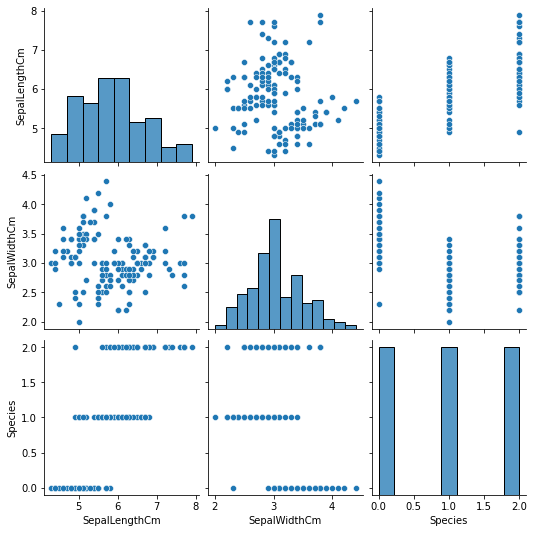

In [39]:
sns.pairplot(df1_train)

<AxesSubplot:>

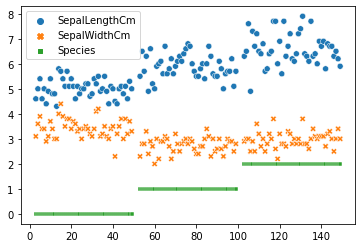

In [40]:
sns.scatterplot(data=df1_train)

In [41]:
Y1=df1_train['Species']
X1=df1_train.drop("Species",axis=1)

In [42]:
Y1_test=df1_test['Species']
X1_test=df1_test.drop("Species",axis=1)


In [43]:
X1_test

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
50,7.0,3.2
51,6.4,3.2
52,6.9,3.1
100,6.3,3.3
101,5.8,2.7
102,7.1,3.0


# Accuracy for 2 features

In [44]:
y_hat1_1=knn_predict(X1,X1_test,Y1,Y1_test,1,2)
y_hat1_3=knn_predict(X1,X1_test,Y1,Y1_test,3,2)
y_hat1_5=knn_predict(X1,X1_test,Y1,Y1_test,5,2)
y_hat1_7=knn_predict(X1,X1_test,Y1,Y1_test,7,2)
Y1_test=list(Y1_test)
print("The accuracy score for different k values for 2 features is as follows:")
print("FOR k=1:",score(Y1_test, y_hat1_1))
print("FOR k=3:",score(Y1_test, y_hat1_3))
print("FOR k=5:",score(Y1_test, y_hat1_5))
print("FOR k=7:",score(Y1_test, y_hat1_7))

The accuracy score for different k values for 2 features is as follows:
FOR k=1: 0.4444444444444444
FOR k=3: 0.5555555555555556
FOR k=5: 0.5555555555555556
FOR k=7: 0.5555555555555556


# B) First take 2 dimensions/features, that is, Sepal Length and Sepal Width.

In [45]:
df_train=pd.DataFrame(columns=df.columns)
df_test=pd.DataFrame(columns=df.columns)

for i in df['Species'].unique():
    df1=df.groupby('Species')
    df1=df1.get_group(i)
    df1=df1.iloc[:3]
    df2=df.groupby('Species')
    df2=df2.get_group(i)
    df2=df2.iloc[3:len(df2)]
    df_train=pd.concat([df_train,df2])
    df_test=pd.concat([df_test,df1])
    

print(df_train.shape)
    

(141, 5)


In [46]:
df_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2


<AxesSubplot:>

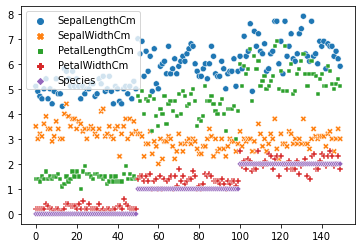

In [47]:
sns.scatterplot(data=df)

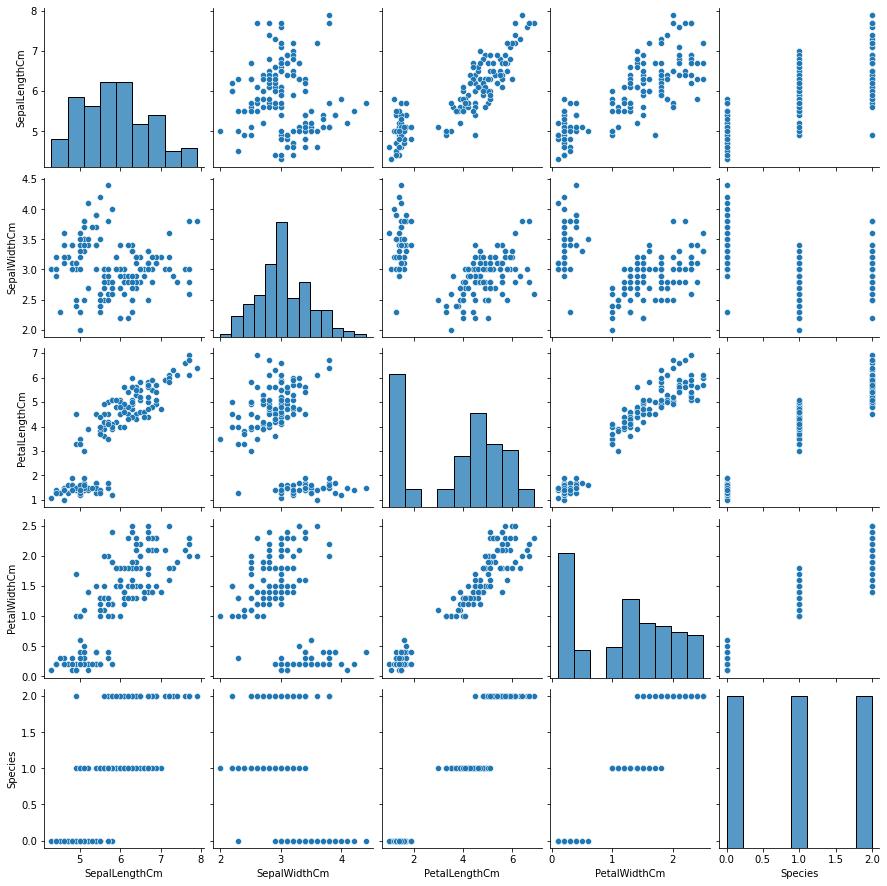

In [48]:
sns.pairplot(df)

In [49]:
Y=df_train['Species']

In [50]:
X=df_train.drop("Species",axis=1)

In [51]:
Y_test=df_test['Species']

In [52]:
X_test=df_test.drop("Species",axis=1)

# Accuracy for 4 features

In [53]:
y_hat_1=knn_predict(X,X_test,Y,Y_test,1,2)
y_hat_3=knn_predict(X,X_test,Y,Y_test,3,2)
y_hat_5=knn_predict(X,X_test,Y,Y_test,5,2)
y_hat_7=knn_predict(X,X_test,Y,Y_test,7,2)
Y_test=list(Y_test)
print("The accuracy score for different k values for 4 features is as follows:")
print("FOR k=1:",score(Y_test, y_hat_1))
print("FOR k=3:",score(Y_test, y_hat_3))
print("FOR k=5:",score(Y_test, y_hat_5))
print("FOR k=7:",score(Y_test, y_hat_7))

The accuracy score for different k values for 4 features is as follows:
FOR k=1: 1.0
FOR k=3: 1.0
FOR k=5: 1.0
FOR k=7: 1.0


# Implementation

1.The code starts by loading the Iris dataset from local folder

2.It then splits the dataset into training and testing sets. The testing set contains the first 3 samples of each class.

3.A scatter plot is created to visualize the distribution of training samples based on sepal length and sepal width.

4.The minkowaski_distance function calculates the Euclidean distance between two data points.

5.The knn_predict function finds the k-nearest neighbors for a given test point in the training set.

6.The predict_class function predicts the class based on the majority class among the nearest neighbors.
Hyperparameter k is set to 1,3,5,7 for the number of neighbors to consider.

7.The code evaluates the accuracy of the classifier on the testing set by comparing predicted and actual classes.this is done by score function





